In [5]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

ds = load_dataset("Mike0307/MNIST-M")

import numpy as np

train_data = ds['train']
test_data = ds['test']

X_train = [np.array(image.resize((28, 28))) for image in train_data['image']]  # Resizing each image to (28, 28)
y_train = train_data['label']

X_test = [np.array(image.resize((28, 28))) for image in test_data['image']]  # Resizing each image to (28, 28)
y_test = test_data['label']

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)  
y_test = np.array(y_test)    

print('The current size of our dataset is : \nX_train -> ',X_train.shape,'\ny_train -> ' , y_train.shape, 
      '\nX_test -> ' , X_test.shape,'\ny_test' , y_test.shape )

The current size of our dataset is : 
X_train ->  (59001, 28, 28, 3) 
y_train ->  (59001,) 
X_test ->  (9001, 28, 28, 3) 
y_test (9001,)


In [6]:
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)


print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )


# now we normalize our data
X_train = X_train/255
X_test = X_test/255

The current size of our dataset is : 
X_train ->  (59001, 2352) 
y_train ->  (59001,) 
X_test ->  (9001, 2352) 
y_test (9001,)


In [7]:
from sklearn.svm import SVC

train_indices = np.random.choice(len(X_train), 30000, replace=False)
X_train_small = X_train[train_indices]
y_train_small = y_train[train_indices]

test_indices = np.random.choice(len(X_test), 5000, replace=False)
X_test_small = X_test[test_indices]
y_test_small = y_test[test_indices]

Svm = SVC(kernel='rbf')
Svm.fit(X_train_small, y_train_small)



SVC()

In [8]:
y_pred = Svm.predict(X_test_small)

accuracy = np.sum(y_pred == y_test_small) / len(y_test_small)

print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test[:1000][:50]}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Predicted labels: [6 9 2 2 4 2 0 3 4 5 2 3 8 0 1 7 1 3 2 4 5 8 3 7 0 8 1 1 9 8 5 9 8 9 7 2 0
 0 2 4 6 9 0 4 2 4 3 5 8 1]
Actual labels:    [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 82.88%


In [10]:
from sklearn.metrics import classification_report
report = classification_report(y_test_small, y_pred, output_dict=True)
    
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

{'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Model': Svm.__class__.__name__}

{'Accuracy': np.float64(0.8288),
 'Precision': 0.8308300720562063,
 'Recall': 0.8288,
 'F1-Score': 0.8281893917316665,
 'Model': 'SVC'}

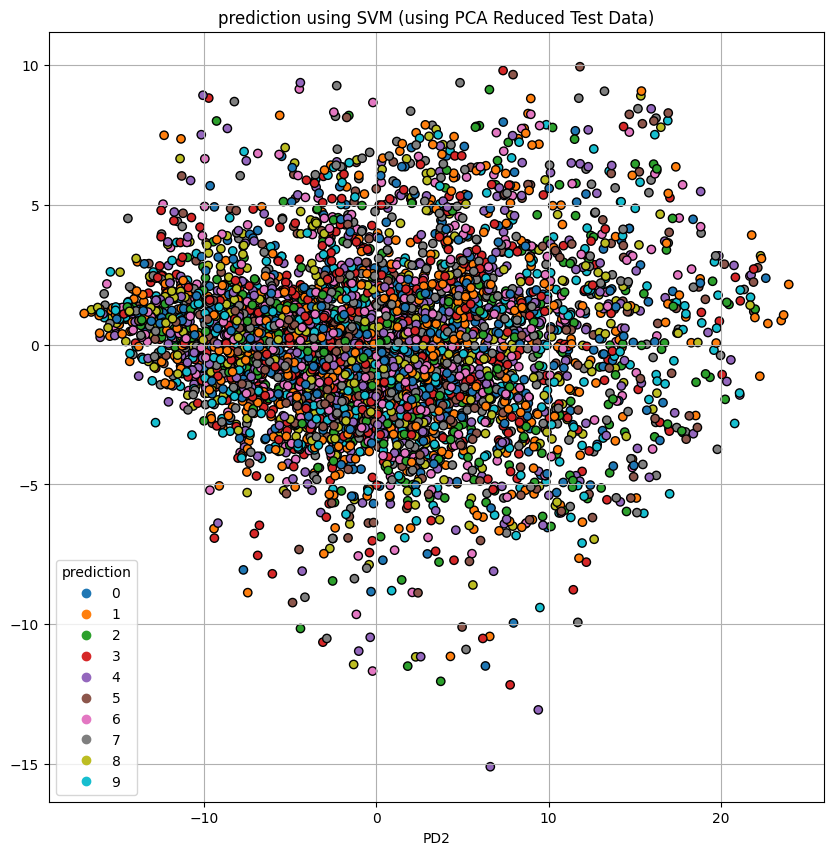

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_test_small)
plt.figure(figsize=(10,10))
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(),title = 'prediction')
plt.title("prediction using SVM (using PCA Reduced Test Data)")
plt.xlabel('PD1')
plt.xlabel('PD2')
plt.grid(True)
plt.show()

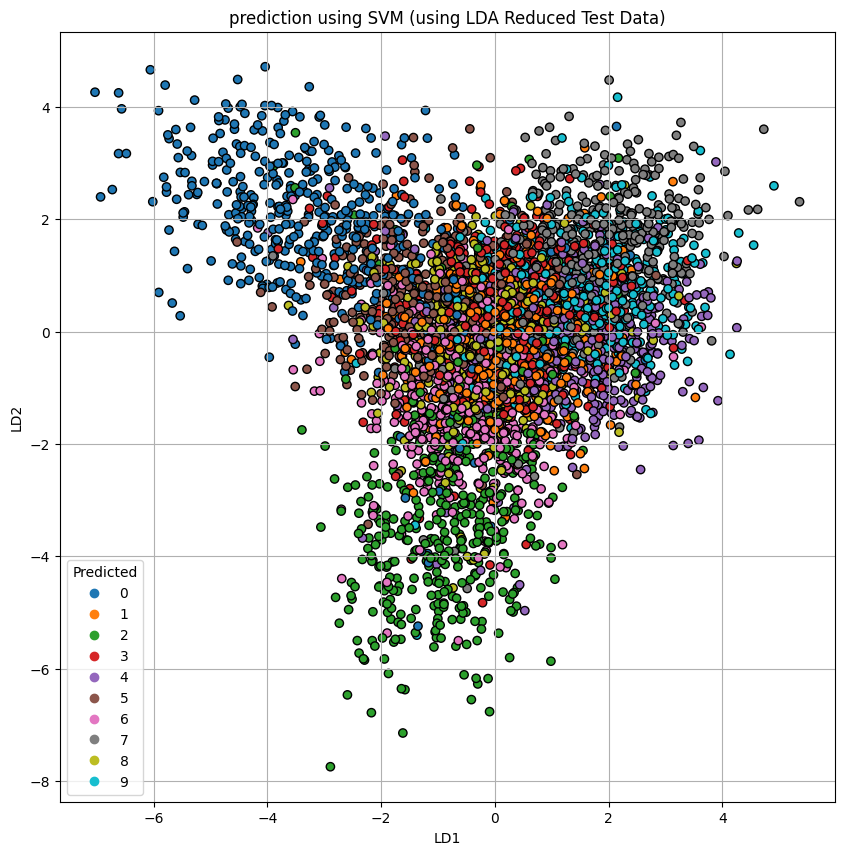

In [14]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_small, y_test_small)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using SVM (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()

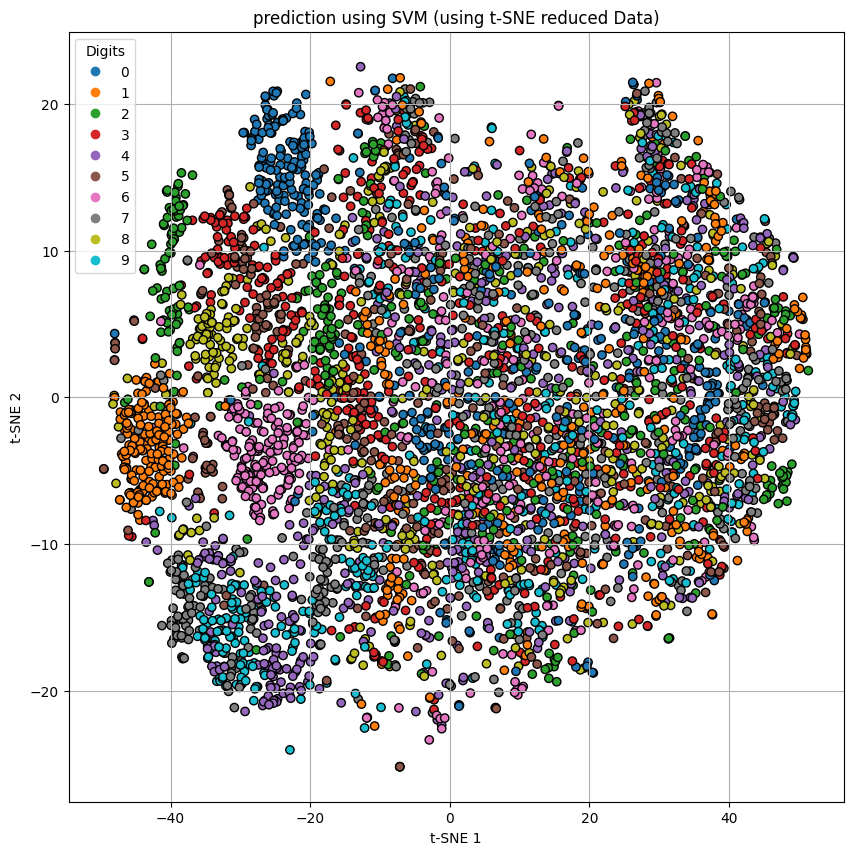

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50,max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_test_small)

plt.figure(figsize=(10,10))
scatter = plt.scatter(X_tsne[:, 0],X_tsne[:, 1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("prediction using SVM (using t-SNE reduced Data)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

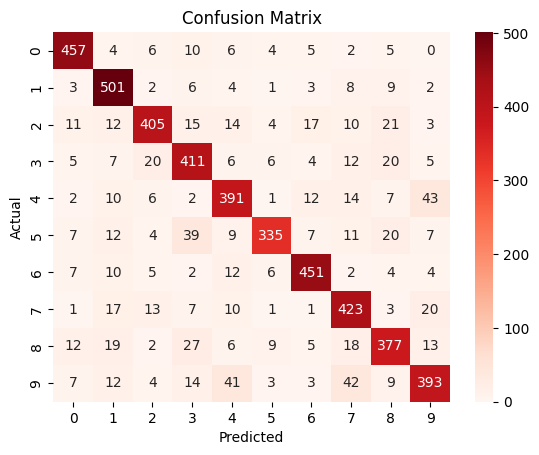

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_small, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

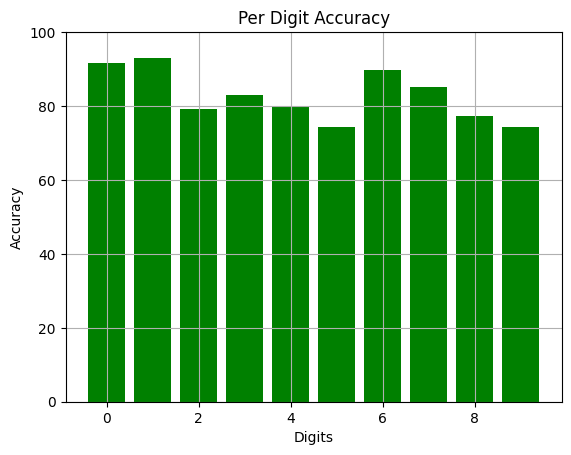

In [17]:
import numpy as np

accuracies = []
for digit in range(10):
    idx = (y_test_small == digit)
    correct = (y_pred[idx] == digit).sum()
    total = idx.sum()
    accuracies.append(correct / total * 100)

plt.bar(range(10), accuracies, color='green')
plt.xlabel("Digits")
plt.ylabel("Accuracy")
plt.title("Per Digit Accuracy")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

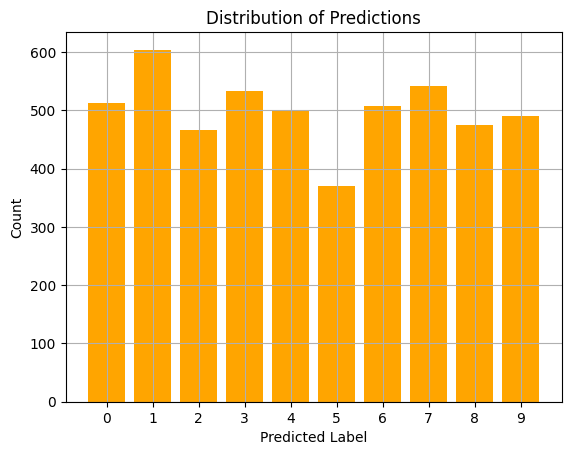

In [18]:
plt.hist(y_pred, bins=np.arange(11)-0.5, rwidth=0.8, color='orange')
plt.xticks(range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Distribution of Predictions")
plt.grid(True)
plt.show()

In [19]:
def rbf_kernel(X, Y, gamma=1e-3):
    XX = np.sum(X**2, axis=1).reshape(-1, 1)
    YY = np.sum(Y**2, axis=1).reshape(1, -1)
    dist = XX + YY - 2 * np.dot(X, Y.T)
    return np.exp(-gamma * dist)

def compute_mmd(X, Y, gamma=1e-3):
    K_xx = rbf_kernel(X, X, gamma)
    K_yy = rbf_kernel(Y, Y, gamma)
    K_xy = rbf_kernel(X, Y, gamma)
    m, n = X.shape[0], Y.shape[0]
    return np.sum(K_xx)/(m**2) + np.sum(K_yy)/(n**2) - 2*np.sum(K_xy)/(m*n)

samples_per_class = 3000
digit_data = {i: X_train[y_train == i][:samples_per_class] for i in range(10)}

mmd_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        mmd_matrix[i, j] = compute_mmd(digit_data[i], digit_data[j])

avg_mmd = np.mean(mmd_matrix, axis=1)
print(f"\nAverage MMD per class: {np.round(avg_mmd, 4)}")

import scipy.special
class_weights = scipy.special.softmax(avg_mmd)

sample_weights = np.array([class_weights[label] for label in y_train_small])

clf_weighted = SVC(kernel='rbf',random_state=42)
clf_weighted.fit(X_train_small, y_train_small, sample_weight=sample_weights)
y_pred_weighted = clf_weighted.predict(X_test_small)
weighted_accuracy = np.mean(y_pred_weighted == y_test_small)

print(f"\nMMD-Weighted Accuracy: {weighted_accuracy * 100:.2f}%")
print(f"Change in Accuracy: {(weighted_accuracy - accuracy) * 100:.2f}%")


Average MMD per class: [0.0086 0.0079 0.0055 0.0053 0.0053 0.0043 0.0061 0.0062 0.0045 0.0051]

MMD-Weighted Accuracy: 72.44%
Change in Accuracy: -10.44%


In [20]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.linalg import fractional_matrix_power

def coral(source, target, regularization=1e-3):
    cov_source = np.cov(source, rowvar=False) + regularization * np.eye(source.shape[1])
    cov_target = np.cov(target, rowvar=False) + regularization * np.eye(target.shape[1])
    cov_source_sqrt = fractional_matrix_power(cov_source, 0.5)
    cov_target_sqrt_inv = fractional_matrix_power(cov_target, -0.5)
    aligned_target = (target - target.mean(axis=0)) @ cov_target_sqrt_inv @ cov_source_sqrt + source.mean(axis=0)
    return aligned_target

n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test_small)

model = SVC(kernel='rbf',random_state=42)
model.fit(X_train_pca, y_train_small)

X_test_aligned = coral(X_train_pca, X_test_pca)

y_pred_coral = model.predict(X_test_aligned)
coral_accuracy = accuracy_score(y_test_small, y_pred_coral)
print(f"CORAL-Aligned Accuracy: {coral_accuracy * 100:.2f}%")
print(f"Accuracy change: {(coral_accuracy - accuracy) * 100:.2f}%")

CORAL-Aligned Accuracy: 76.02%
Accuracy change: -6.86%
